In [1]:
############################################Q2 Assignment 1-B#########################################################
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore")

path=r'C:\Users\udit sharma\Desktop\Aut\Data Mining and Machine Learning\Data sets Assignment 1\Diabe.csv'
rawdata = pd.read_csv(path) #Read the Diabates Dataset
rawdata.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
########################################## Q2 Part 1 ################################################################
nrow, ncol = rawdata.shape
predictors=rawdata.iloc[:,0:ncol-1]
target=rawdata.iloc[:,-1]
pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors,target,test_size=.3,shuffle=False)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

####################################################
#----------Multilayer Preceptron---------
##############################################

clf = MLPClassifier(hidden_layer_sizes=(20,), max_iter=150) # decalre the MLP classifier
clf.fit(pred_train,tar_train) # train the MLP classifier
predictions1 = clf.predict(pred_test)
probMLP=clf.predict_proba(pred_test)
print("Accuracy score of our model with MLP :", accuracy_score(tar_test, predictions1))
scores = cross_val_score(clf, predictors, target, cv=10)
print("Accuracy score of our model with MLP under cross validation :", scores.mean())

Accuracy score of our model with MLP : 0.6190476190476191
Accuracy score of our model with MLP under cross validation : 0.6809125085440876


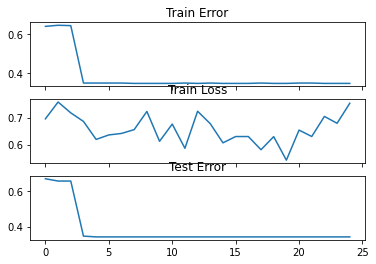

In [3]:
########################################## Q2 Part 2 ################################################################

import matplotlib.pyplot as plt

X_train, X_test = pred_train,pred_test
y_train, y_test =  tar_train,tar_test

mlp = MLPClassifier(hidden_layer_sizes=(20,), max_iter=150, alpha=1e-4,
                    solver='sgd', verbose=0, tol=1e-8, random_state=1,
                    learning_rate_init=.01)

N_TRAIN_SAMPLES = X_train.shape[0]
N_EPOCHS = 25
N_BATCH = 64
N_CLASSES = np.unique(y_train)

scores_train = []
scores_test = []
mlploss = []

# EPOCH
epoch = 0
while epoch < N_EPOCHS:
#     print('epoch: ', epoch)
    # SHUFFLING
    random_perm = np.random.permutation(X_train.shape[0])
    mini_batch_index = 0
    while True:
        # MINI-BATCH
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]

        mlp.partial_fit(X_train.iloc[indices], y_train[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    # SCORE TRAIN
    scores_train.append(1 - mlp.score(X_train, y_train))

    # SCORE TEST
    scores_test.append(1 - mlp.score(X_test, y_test))

    # compute loss

    mlploss.append(mlp.loss_)
    epoch += 1

""" Plot """
fig, ax = plt.subplots(3, sharex=True)
ax[0].plot(scores_train)
ax[0].set_title('Train Error')
ax[1].plot(mlploss)
ax[1].set_title('Train Loss')
ax[2].plot(scores_test)
ax[2].set_title('Test Error')
plt.show()

Nuerons      Accuracy Score
---------  ----------------
(20 , 0)           0.619048
(19 , 1)           0.658009
(18 , 2)           0.658009
(17 , 3)           0.632035
(16 , 4)           0.666667
(15 , 5)           0.675325
(14 , 6)           0.675325
(13 , 7)           0.632035
(12 , 8)           0.658009
(11 , 9)           0.623377
(10 , 10)          0.658009
(9 , 11)           0.645022
(8 , 12)           0.65368
(7 , 13)           0.519481
(6 , 14)           0.688312
(5 , 15)           0.701299
(4 , 16)           0.649351
(3 , 17)           0.65368
(2 , 18)           0.632035
(1 , 19)           0.658009


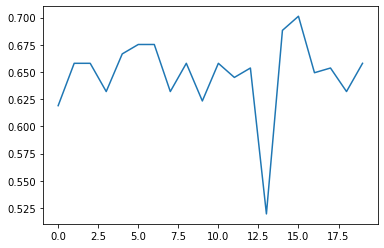

In [4]:
########################################## Q2 Part 3 ################################################################

acc_plt=[]
acc_score=[]
acca=['(20 , 0)',accuracy_score(tar_test, predictions1)]
acc_score.append(acca)
acc_plt.append(acca[1])
for i in range(19):
 acca=[]
 mlp = MLPClassifier(hidden_layer_sizes=(20-i-1,i+1),max_iter=150)
     # , alpha=1e-4,
     #                solver='sgd', verbose=0, tol=1e-8, random_state=1,
     #                learning_rate_init=.01)
 mlp.fit(pred_train, tar_train)
 predictions1 = mlp.predict(pred_test)
 # probMLP = clf.predict_proba(pred_test)
 acca=['('+str(20-i-1)+' , '+str(i+1)+')',accuracy_score(tar_test, predictions1)]
 # print(20-i-1,i+1, accuracy_score(tar_test, predictions1))
 acc_plt.append(acca[1])
 acc_score.append(acca)

acc_score1=acc_plt
from tabulate import tabulate
print(tabulate(acc_score, headers=['Nuerons', 'Accuracy Score']))
plt.plot(acc_plt)
plt.show()

In [5]:
########################################## Q2 Part 7 ################################################################

####################################################
#----------Heart Disease Data---------
##############################################

path=r'C:\Users\udit sharma\Desktop\Aut\Data Mining and Machine Learning\Data sets Assignment 1\Heart_data.csv'
heartData = pd.read_csv(path)
heartData.head()

,(age),(sex),(cp),(trestbps),(chol),(fbs),(restecg),(thalach),(exang),(oldpeak),(slope),(ca),(thal),(the predicted attribute)
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Nuerons      Accuracy Score
---------  ----------------
(20 , 0)           0.428571
(19 , 1)           0.175824
(18 , 2)           0.538462
(17 , 3)           0.527473
(16 , 4)           0.505495
(15 , 5)           0.362637
(14 , 6)           0.461538
(13 , 7)           0.516484
(12 , 8)           0.56044
(11 , 9)           0.56044
(10 , 10)          0.516484
(9 , 11)           0.362637
(8 , 12)           0.450549
(7 , 13)           0.494505
(6 , 14)           0.483516
(5 , 15)           0.494505
(4 , 16)           0.527473
(3 , 17)           0.527473
(2 , 18)           0.527473
(1 , 19)           0.527473


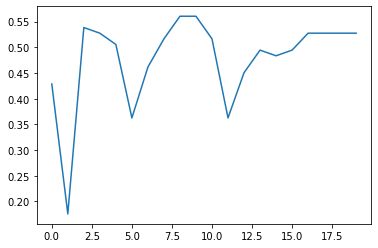

In [6]:
heartData['(ca)'] = heartData['(ca)'].fillna(heartData['(ca)'].mean())
heartData['(thal)'] = heartData['(thal)'].fillna(heartData['(thal)'].mean())


nrow, ncol = heartData.shape
predictors=heartData.iloc[:,0:ncol-1]
target=heartData.iloc[:,-1]
pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors,target,test_size=.3,shuffle=False)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

clf = MLPClassifier(hidden_layer_sizes=(20,), max_iter=150)
clf.fit(pred_train,tar_train)
predictions1 = clf.predict(pred_test)

acc_plt=[]
acc_score=[]
acca=['(20 , 0)',accuracy_score(tar_test, predictions1)]
acc_score.append(acca)
acc_plt.append(acca[1])
for i in range(19):
 acca=[]
 mlp = MLPClassifier(hidden_layer_sizes=(20-i-1,i+1),max_iter=150)
 mlp.fit(pred_train, tar_train)
 predictions1 = mlp.predict(pred_test)
 # probMLP = clf.predict_proba(pred_test)
 acca=['('+str(20-i-1)+' , '+str(i+1)+')',accuracy_score(tar_test, predictions1)]
 # print(20-i-1,i+1, accuracy_score(tar_test, predictions1))
 acc_plt.append(acca[1])
 acc_score.append(acca)

acc_score2=acc_plt
from tabulate import tabulate
print(tabulate(acc_score, headers=['Nuerons', 'Accuracy Score']))
plt.plot(acc_plt)
plt.show()

In [7]:
####################################################
#----------Hepatitis C Virus Data---------
##############################################
path=r'C:\Users\udit sharma\Desktop\Aut\Data Mining and Machine Learning\Data sets Assignment 1\HCV-Egy-Data.csv'
hcVirus = pd.read_csv(path)
hcVirus.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


Nuerons      Accuracy Score
---------  ----------------
(20 , 0)           0.257212
(19 , 1)           0.21875
(18 , 2)           0.259615
(17 , 3)           0.216346
(16 , 4)           0.262019
(15 , 5)           0.262019
(14 , 6)           0.262019
(13 , 7)           0.216346
(12 , 8)           0.269231
(11 , 9)           0.21875
(10 , 10)          0.257212
(9 , 11)           0.278846
(8 , 12)           0.257212
(7 , 13)           0.259615
(6 , 14)           0.257212
(5 , 15)           0.25
(4 , 16)           0.230769
(3 , 17)           0.242788
(2 , 18)           0.259615
(1 , 19)           0.271635


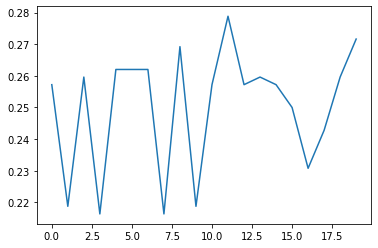

In [8]:
nrow, ncol = hcVirus.shape
predictors=hcVirus.iloc[:,0:ncol-1]
target=hcVirus.iloc[:,-1]
pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors,target,test_size=.3,shuffle=False)

clf = MLPClassifier(hidden_layer_sizes=(20,), max_iter=150)
clf.fit(pred_train,tar_train)
predictions1 = clf.predict(pred_test)

acc_plt=[]
acc_score=[]
acca=['(20 , 0)',accuracy_score(tar_test, predictions1)]
acc_score.append(acca)
acc_plt.append(acca[1])
for i in range(19):
 acca=[]
 mlp = MLPClassifier(hidden_layer_sizes=(20-i-1,i+1),max_iter=150)
 mlp.fit(pred_train, tar_train)
 predictions1 = mlp.predict(pred_test)
 acca=['('+str(20-i-1)+' , '+str(i+1)+')',accuracy_score(tar_test, predictions1)]
 acc_plt.append(acca[1])
 acc_score.append(acca)

acc_score3=acc_plt
from tabulate import tabulate
print(tabulate(acc_score, headers=['Nuerons', 'Accuracy Score']))
plt.plot(acc_plt)
plt.show()

In [9]:
####################################################
#----------Congress Voting Record Dataset---------
##############################################
path=r'C:\Users\udit sharma\Desktop\Aut\Data Mining and Machine Learning\Data sets Assignment 1\Parliament.csv'
parliament= pd.read_csv(path)
parliament.head()

,Class name 2 (democrat republican),export-administration-act-south-africa,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,ph1sician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,s1nfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports
0,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,1,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,1,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


Nuerons      Accuracy Score
---------  ----------------
(20 , 0)           0.908397
(19 , 1)           0.877863
(18 , 2)           0.923664
(17 , 3)           0.885496
(16 , 4)           0.603053
(15 , 5)           0.931298
(14 , 6)           0.908397
(13 , 7)           0.908397
(12 , 8)           0.931298
(11 , 9)           0.931298
(10 , 10)          0.923664
(9 , 11)           0.931298
(8 , 12)           0.931298
(7 , 13)           0.938931
(6 , 14)           0.908397
(5 , 15)           0.931298
(4 , 16)           0.900763
(3 , 17)           0.870229
(2 , 18)           0.847328
(1 , 19)           0.832061


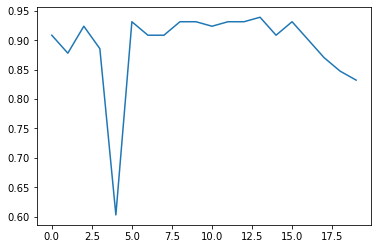

In [10]:
parliament = parliament.fillna(0)
nrow, ncol = parliament.shape
predictors=parliament.iloc[:,1:ncol]
target=parliament.iloc[:,0]
pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors,target,test_size=.3,shuffle=False)

clf = MLPClassifier(hidden_layer_sizes=(20,), max_iter=150)
clf.fit(pred_train,tar_train)
predictions1 = clf.predict(pred_test)

acc_plt=[]
acc_score=[]
acca=['(20 , 0)',accuracy_score(tar_test, predictions1)]
acc_score.append(acca)
acc_plt.append(acca[1])
for i in range(19):
 acca=[]
 mlp = MLPClassifier(hidden_layer_sizes=(20-i-1,i+1),max_iter=150)
 mlp.fit(pred_train, tar_train)
 predictions1 = mlp.predict(pred_test)
 acca=['('+str(20-i-1)+' , '+str(i+1)+')',accuracy_score(tar_test, predictions1)]
 acc_plt.append(acca[1])
 acc_score.append(acca)

acc_score4=acc_plt
from tabulate import tabulate
print(tabulate(acc_score, headers=['Nuerons', 'Accuracy Score']))
plt.plot(acc_plt)
plt.show()

In [11]:
####################################################
#----------Car Condition Identification Data---------
##############################################
path=r'C:\Users\udit sharma\Desktop\Aut\Data Mining and Machine Learning\Data sets Assignment 1\car.csv'
car= pd.read_csv(path)
car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Nuerons      Accuracy Score
---------  ----------------
(20 , 0)           0.543353
(19 , 1)           0.589595
(18 , 2)           0.587669
(17 , 3)           0.56262
(16 , 4)           0.587669
(15 , 5)           0.597303
(14 , 6)           0.537572
(13 , 7)           0.581888
(12 , 8)           0.614644
(11 , 9)           0.576108
(10 , 10)          0.558767
(9 , 11)           0.524085
(8 , 12)           0.55684
(7 , 13)           0.583815
(6 , 14)           0.547206
(5 , 15)           0.599229
(4 , 16)           0.585742
(3 , 17)           0.583815
(2 , 18)           0.587669
(1 , 19)           0.56262


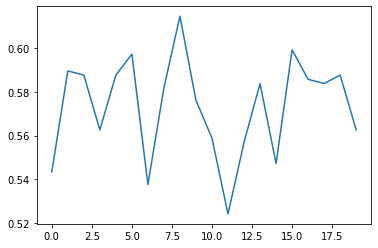

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
str_class = ['class','buying','maint','lug_boot','safety']
for i in str_class:
 car[i]= label_encoder.fit_transform(car[i])
car.persons = car.persons.replace({'more':6})
car.doors = car.doors.replace({'5more':5})

nrow, ncol = car.shape
predictors=car.iloc[:,0:ncol-1]
target=car.iloc[:,-1]
pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors,target,test_size=.3,shuffle=False)

clf = MLPClassifier(hidden_layer_sizes=(20,), max_iter=150)
clf.fit(pred_train,tar_train)
predictions1 = clf.predict(pred_test)

acc_plt=[]
acc_score=[]
acca=['(20 , 0)',accuracy_score(tar_test, predictions1)]
acc_score.append(acca)
acc_plt.append(acca[1])
for i in range(19):
 acca=[]
 mlp = MLPClassifier(hidden_layer_sizes=(20-i-1,i+1),max_iter=150)
 mlp.fit(pred_train, tar_train)
 predictions1 = mlp.predict(pred_test)
 acca=['('+str(20-i-1)+' , '+str(i+1)+')',accuracy_score(tar_test, predictions1)]
 acc_plt.append(acca[1])
 acc_score.append(acca)

acc_score5=acc_plt
from tabulate import tabulate
print(tabulate(acc_score, headers=['Nuerons', 'Accuracy Score']))
plt.plot(acc_plt)
plt.show()

The accuracy scores for different datasets while changing Neurons in hidden layer are:-

Neurons      Diabates     Heart       HCV    congress Voting       Car
---------  ----------  --------  --------  -----------------  --------
(20 , 0)     0.619048  0.428571  0.257212           0.908397  0.543353
(19 , 1)     0.658009  0.175824  0.21875            0.877863  0.589595
(18 , 2)     0.658009  0.538462  0.259615           0.923664  0.587669
(17 , 3)     0.632035  0.527473  0.216346           0.885496  0.56262
(16 , 4)     0.666667  0.505495  0.262019           0.603053  0.587669
(15 , 5)     0.675325  0.362637  0.262019           0.931298  0.597303
(14 , 6)     0.675325  0.461538  0.262019           0.908397  0.537572
(13 , 7)     0.632035  0.516484  0.216346           0.908397  0.581888
(12 , 8)     0.658009  0.56044   0.269231           0.931298  0.614644
(11 , 9)     0.623377  0.56044   0.21875            0.931298  0.576108
(10 , 10)    0.658009  0.516484  0.257212           0.923664

Text(0.5, 0.98, 'Accuracy Score Plot for different Datasets')

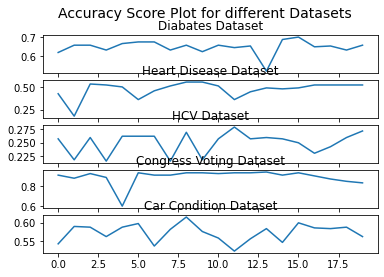

In [13]:
from tabulate import tabulate
acc_plt=[]
for i in range(len(acc_score1)):
    acc_plt.append(['('+str(20-i)+' , '+str(i)+')',acc_score1[i],acc_score2[i],acc_score3[i],acc_score4[i],acc_score5[i]])
print('The accuracy scores for different datasets while changing Neurons in hidden layer are:-\n')
print(tabulate(acc_plt, headers=['Neurons','Diabates', 'Heart','HCV','congress Voting','Car']))
fig, ax = plt.subplots(5, sharex=True)
ax[0].plot(acc_score1)
ax[0].set_title('Diabates Dataset')
ax[1].plot(acc_score2)
ax[1].set_title('Heart Disease Dataset')
ax[2].plot(acc_score3)
ax[2].set_title('HCV Dataset')
ax[3].plot(acc_score4)
ax[3].set_title('Congress Voting Dataset')
ax[4].plot(acc_score5)
ax[4].set_title('Car Condition Dataset')
fig.suptitle("Accuracy Score Plot for different Datasets", fontsize=14)